In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE, mutual_info_regression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
data = pd.read_csv("C:/Users/user/OneDrive/Desktop/final_internship_data.csv")

In [3]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [6]:
data.isnull().sum()

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
499995    False
499996    False
499997    False
499998    False
499999    False
Length: 499995, dtype: bool

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data = data[data['distance'] > 0]

In [11]:
# Check for records with negative fare_amount
negative_fare_count = len(data[data['fare_amount'] < 0])
print(f"Number of records with negative fare_amount: {negative_fare_count}")

# Check for records with zero fare_amount
zero_fare_count = len(data[data['fare_amount'] == 0])
print(f"Number of records with zero fare_amount: {zero_fare_count}")

Number of records with negative fare_amount: 21
Number of records with zero fare_amount: 11


In [12]:
# Drop records with fare_amount less than or equal to 0
data = data[~(data['fare_amount'] <= 0)]

In [13]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000,485713.000000
mean,11.353899,-1.288889,0.709485,-1.288934,0.709418,1.684447,13.512618,15.682372,6.269663,3.041994,2011.743785,75.790899,69.657778,53.552047,52.896570,45.164897,20.023349,0.305848
std,9.781087,0.117719,0.106199,0.115820,0.089276,1.308246,6.509265,8.681625,3.438846,1.948670,1.864055,794.565143,796.301389,796.217619,796.428742,796.668897,372.439502,1.830096
min,0.010000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.143207,0.000084,-3.141593
25%,6.000000,-1.291409,0.710985,-1.291396,0.710968,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.321430,32.124331,17.056902,14.815297,7.078886,1.281470,-0.895782
50%,8.500000,-1.291231,0.711280,-1.291205,0.711289,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.487913,34.675024,19.510278,18.211678,10.329304,2.182594,-0.124577
75%,12.500000,-1.290992,0.711526,-1.290938,0.711543,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.691277,38.063471,22.042195,22.148996,14.181648,3.976079,2.254230
max,495.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [14]:
col = data.columns
for c in col:
  print(c)
  print(data[c].unique())
  print('--------------------------')

User ID
['KHVrEVlD' 'lPxIuEri' 'gsVN8JLS' ... 'QZIMcpLZ' 'AD72Uwmn' 'qGKn4Um5']
--------------------------
User Name
['Kimberly Adams' 'Justin Tapia' 'Elizabeth Lopez' ... 'Monique Wade'
 'Wanda Parks' 'Dillon Jackson']
--------------------------
Driver Name
['Amy Butler' 'Hannah Zimmerman' 'Amanda Jackson' ... 'Gabriel Coleman'
 'Larry Richards' 'Lonnie Santana']
--------------------------
Car Condition
['Very Good' 'Excellent' 'Bad' 'Good']
--------------------------
Weather
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
--------------------------
Traffic Condition
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']
--------------------------
key
['2009-06-15 17:26:21.0000001' '2010-01-05 16:52:16.0000002'
 '2011-08-18 00:35:00.00000049' ... '2014-08-25 00:22:20.0000001'
 '2015-01-12 12:17:32.0000001' '2010-04-12 23:46:58.0000002']
--------------------------
fare_amount
[ 4.5  16.9   5.7  ... 45.58 70.75 71.7 ]
--------------------------
pickup_datetime
['2009-06-15 17:26:21' '2010-01-

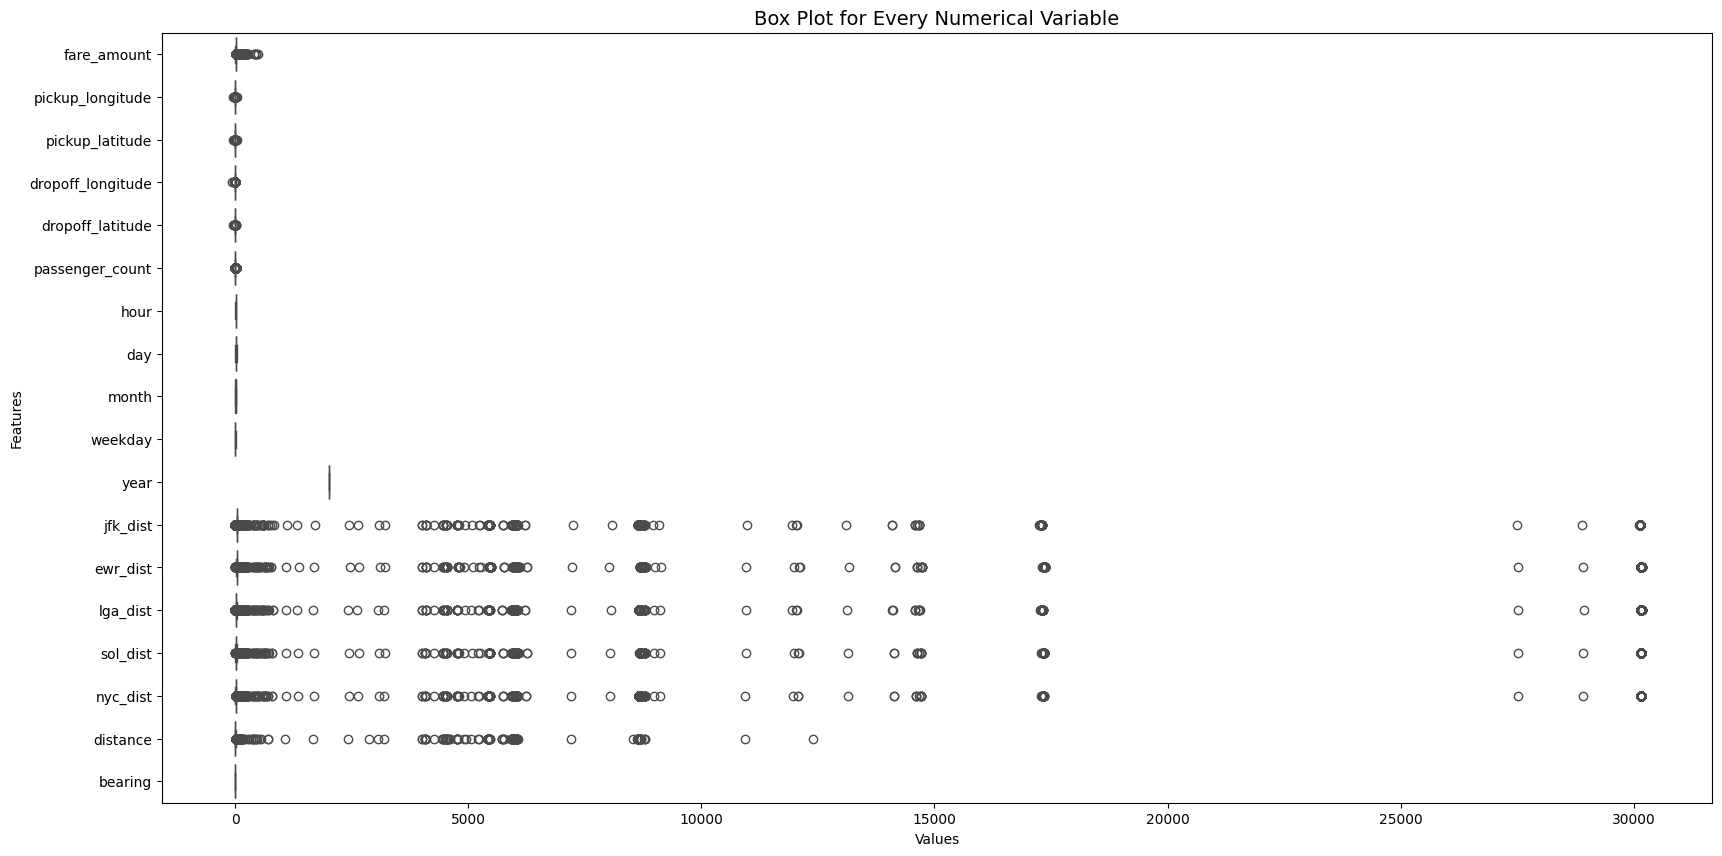

In [15]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient="h", palette="coolwarm")
plt.title("Box Plot for Every Numerical Variable", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numeric_columns = data.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    data = remove_outliers_iqr(data, col)

print("data shape:", data.shape)

data shape: (338678, 26)


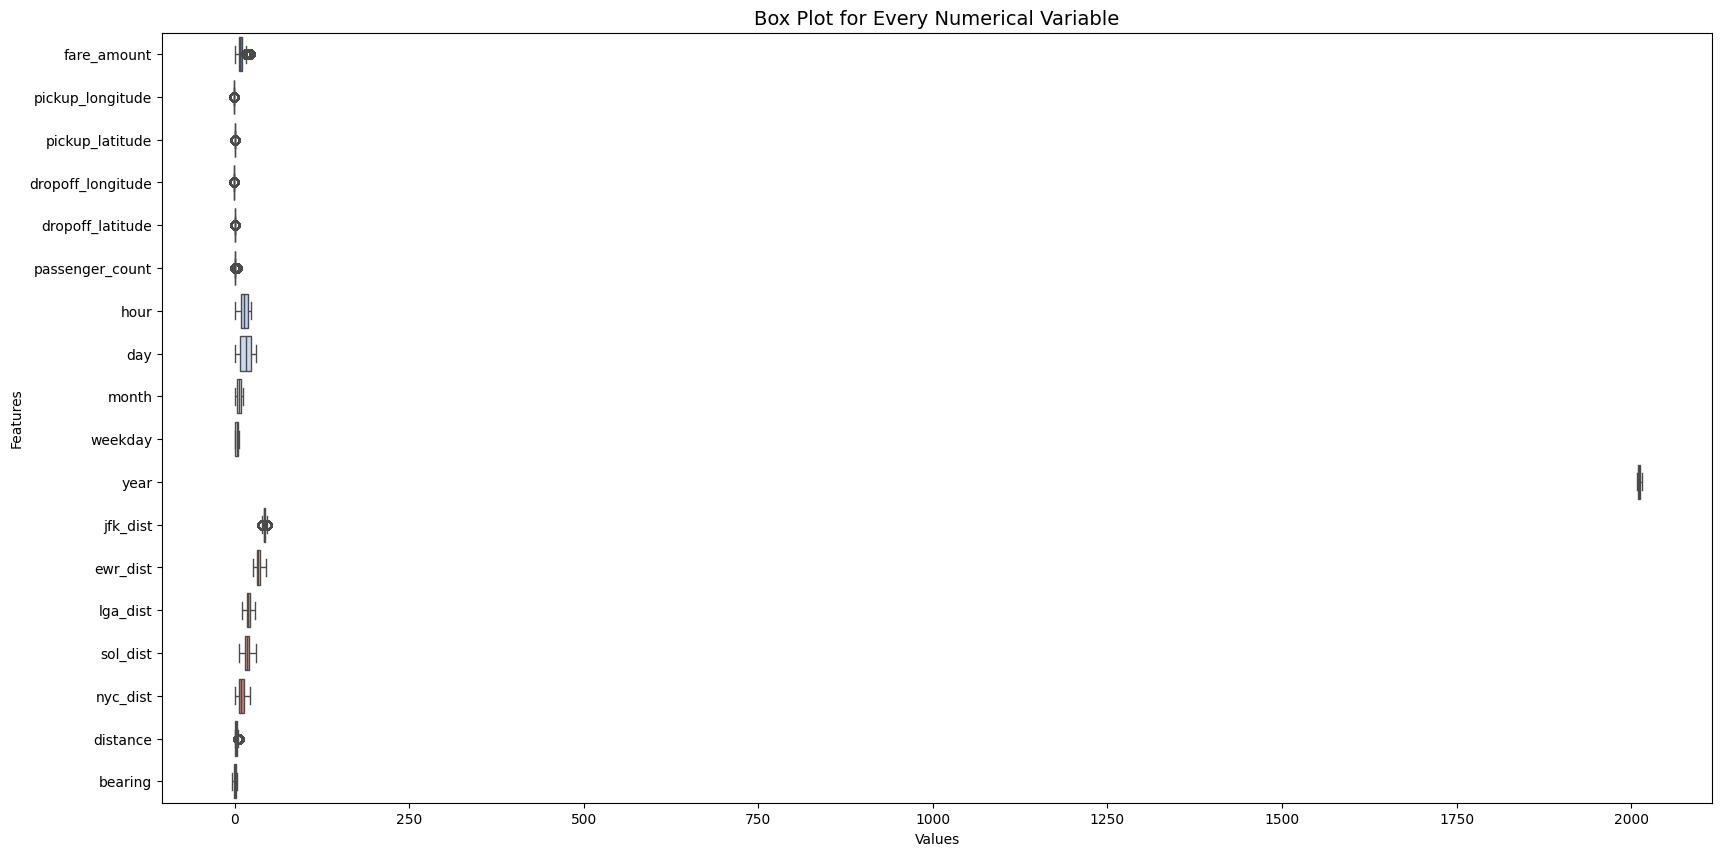

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=data, orient="h", palette="coolwarm")
plt.title("Box Plot for Every Numerical Variable", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

--------------------------------------------------------

In [16]:
#Encoding to give me the percentage value for the columns

# Percentage encoding for categorical features
categorical_features = ['Car Condition', 'Weather', 'Traffic Condition']

def calculate_percentages(df, column):
    counts = df[column].value_counts()
    percentages = counts / len(df) * 100
    return df[column].map(percentages)

# Replace categorical values with their corresponding percentage values for specified columns
for column in categorical_features:
    data[column] = calculate_percentages(data, column)

In [17]:
data.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,25.088137,19.975021,33.307153,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,24.974460,19.975021,33.359415,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,25.088137,19.975021,33.307153,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,24.926626,20.051494,33.307153,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,24.926626,19.932207,33.359415,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260


In [18]:
col = data.columns
for c in col:
  print(c)
  print(data[c].unique())
  print('--------------------------')

User ID
['gsVN8JLS' '9I7kWFgd' '8QN5ZaGN' ... 'er7Luy6J' 'FWDZu9NA' 'qGKn4Um5']
--------------------------
User Name
['Elizabeth Lopez' 'Steven Wilson' 'Alexander Andrews' ... 'Stacy Spencer'
 'Matthew Pratt' 'Dillon Jackson']
--------------------------
Driver Name
['Amanda Jackson' 'Amy Horn' 'Cassandra Larson' ... 'Lori Neal DDS'
 'Gabriel Coleman' 'Larry Richards']
--------------------------
Car Condition
[25.08813681 24.97445952 24.92662647 25.0107772 ]
--------------------------
Weather
[19.97502052 20.05149434 19.93220699 20.01990091 20.02137724]
--------------------------
Traffic Condition
[33.30715311 33.35941514 33.33343176]
--------------------------
key
['2011-08-18 00:35:00.00000049' '2012-04-21 04:30:42.0000001'
 '2010-03-09 07:51:00.000000135' ... '2015-05-07 18:45:12.0000004'
 '2010-09-13 12:11:34.0000004' '2010-04-12 23:46:58.0000002']
--------------------------
fare_amount
[5.700e+00 7.700e+00 5.300e+00 1.210e+01 7.500e+00 1.650e+01 9.000e+00
 8.900e+00 4.100e+00 7.000

In [134]:
#one-hot Encoding

# List of categorical features to encode
categorical_features = ['Car Condition', 'Weather', 'Traffic Condition']

# Perform one-hot encoding using get_dummies with drop_first=True to avoid multicollinearity
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Loop through each column and convert bool to int
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data[col].astype(int)


In [135]:
data.head()

,User ID,User Name,Driver Name,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,bearing,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,...,2.599961,0,0,0,0,1,0,0,0,0
3,9I7kWFgd,Steven Wilson,Amy Horn,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,...,0.133905,0,0,1,0,1,0,0,0,1
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,...,-0.502703,0,0,0,0,1,0,0,0,0
5,mMC7oPiW,Kayla Martin,Wendy Bennett,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,0.710901,-1.291071,0.711365,...,-0.674251,1,0,0,0,0,1,0,0,0
6,A2SNLxxM,James Burch,Casey Cannon,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,0.711251,-1.291086,0.711481,...,-0.342260,1,0,0,0,0,0,1,0,1


----------------------------------------------------

In [19]:
data.drop(['User ID', 'key', 'pickup_datetime'], axis=1, inplace=True)

In [20]:
data.head()

,User Name,Driver Name,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
2,Elizabeth Lopez,Amanda Jackson,25.088137,19.975021,33.307153,5.7,-1.291242,0.711418,-1.291391,0.711231,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Steven Wilson,Amy Horn,24.974460,19.975021,33.359415,7.7,-1.291319,0.710927,-1.291396,0.711363,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Alexander Andrews,Cassandra Larson,25.088137,19.975021,33.307153,5.3,-1.290987,0.711536,-1.290787,0.711811,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,Kayla Martin,Wendy Bennett,24.926626,20.051494,33.307153,12.1,-1.291560,0.710901,-1.291071,0.711365,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,James Burch,Casey Cannon,24.926626,19.932207,33.359415,7.5,-1.291195,0.711251,-1.291086,0.711481,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260


----------------------------------------------------------------------------------------------

In [71]:
X = data.drop(columns=['fare_amount', 'User Name', 'Driver Name'])
y = data['fare_amount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [63]:
# K-Best Feature Selection
k_best_selector = SelectKBest(score_func=f_regression, k=10)
X_train_kbest = k_best_selector.fit_transform(X_train, y_train)
X_test_kbest = k_best_selector.transform(X_test)


c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# Get the selected feature indices
selected_indices_kbest = k_best_selector.get_support(indices=True)

# Get the selected feature names
selected_features_kbest = X.columns[selected_indices_kbest]

# Display the selected features
print("Selected features using K-Best:", selected_features_kbest)

Selected features using K-Best: Index(['pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'month',
       'year', 'ewr_dist', 'lga_dist', 'sol_dist', 'distance', 'bearing'],
      dtype='object')


In [65]:
X_selected = X[selected_features_kbest]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [67]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)
y_XGB_predict = xgb_model.predict(X_test)
print("r2 score = ", r2_score(y_test, y_XGB_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_XGB_predict)))

r2 score =  0.7313739718446348
Root Mean Squared Error (RMSE): 1.7839734951076407


In [68]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [69]:
# Predictions for Linear Regression
y_pred_lr = linear_reg.predict(X_test)

# Evaluation Metrics for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [70]:
print(f"Linear Regression RMSE: {rmse_lr}, R²: {r2_lr}")

Linear Regression RMSE: 2.0357499819455165, R²: 0.6501997024081476


In [58]:
# KNN Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(knn_reg, knn_params, cv=5, n_iter=10, random_state=42)
knn_random_search.fit(X_train, y_train)

# Best KNN parameters
best_knn_params = knn_random_search.best_params_

In [60]:
# Predictions for KNN Regression with best params
knn_best_model = knn_random_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test)

# Evaluation Metrics for KNN Regression
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression RMSE: {rmse_knn}, R²: {r2_knn}")

KNN Regression RMSE: 2.011738302735504, R²: 0.6584028292781643


c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
# Initialize SVR
svr = SVR()

# Hyperparameter tuning for SVR
svr_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4], # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

svr_random_search = RandomizedSearchCV(svr, svr_params, cv=5, n_iter=10, random_state=42)
svr_random_search.fit(X_train, y_train)

# Best SVR parameters
best_svr_params = svr_random_search.best_params_

In [ ]:
# Predictions for SVR with best params
svr_best_model = svr_random_search.best_estimator_
y_pred_svr = svr_best_model.predict(X_test)

# Evaluation Metrics for SVR
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr}, R²: {r2_svr}")

In [82]:
# Initialize MLP Regressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning for MLP Regressor
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(mlp, mlp_params, cv=5, n_iter=10, random_state=42)
mlp_random_search.fit(X_train, y_train)

# Best MLP parameters
best_mlp_params = mlp_random_search.best_params_

In [83]:
# Predictions for MLP Regressor with best params
mlp_best_model = mlp_random_search.best_estimator_
y_pred_mlp = mlp_best_model.predict(X_test)

# Evaluation Metrics for MLP Regressor
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor RMSE: {rmse_mlp}, R²: {r2_mlp}")

MLP Regressor RMSE: 2.0921687745189814, R²: 0.6329108549459006


c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


--------------------------------------------------------------------------------------------

In [31]:
X = data.drop(columns=['fare_amount', 'User Name', 'Driver Name'])
y = data['fare_amount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Lasso Feature Selection
lasso = LassoCV(cv=5)
lasso.fit(X_train, y_train)
lasso_coefs = lasso.coef_

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 302.78627065801993, tolerance: 225.23951360656233
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446.7914241508115, tolerance: 225.23951360656233
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 462.263012623298, tolerance: 225.23951360656233
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\user\OneDrive

In [33]:
# Get the selected feature indices (non-zero coefficients)
selected_indices_lasso = np.where(lasso_coefs != 0)[0]

# Get the selected feature names
selected_features_lasso = X.columns[selected_indices_lasso]

# Display the selected features
print("Selected features using Lasso:", selected_features_lasso)


Selected features using Lasso: Index(['passenger_count', 'hour', 'day', 'month', 'weekday', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')


In [34]:
X_selected = X[selected_features_lasso]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [36]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)
y_XGB_predict = xgb_model.predict(X_test)
print("r2 score = ", r2_score(y_test, y_XGB_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_XGB_predict)))

r2 score =  0.7687293131633574
Root Mean Squared Error (RMSE): 1.6552921191971344


In [34]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predictions for Linear Regression
y_pred_lr = linear_reg.predict(X_test)

# Evaluation Metrics for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
print(f"Linear Regression RMSE: {rmse_lr}, R²: {r2_lr}")

Linear Regression RMSE: 2.0433216872929485, R²: 0.6475927906170196


In [49]:
# KNN Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [50]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(knn_reg, knn_params, cv=5, n_iter=10, random_state=42)
knn_random_search.fit(X_train, y_train)

# Best KNN parameters
best_knn_params = knn_random_search.best_params_

In [ ]:
# Predictions for KNN Regression with best params
knn_best_model = knn_random_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test)

# Evaluation Metrics for KNN Regression
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression RMSE: {rmse_knn}, R²: {r2_knn}")

In [ ]:
# Initialize SVR
svr = SVR()

# Hyperparameter tuning for SVR
svr_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4], # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

svr_random_search = RandomizedSearchCV(svr, svr_params, cv=5, n_iter=10, random_state=42)
svr_random_search.fit(X_train, y_train)

# Best SVR parameters
best_svr_params = svr_random_search.best_params_

In [ ]:
# Predictions for SVR with best params
svr_best_model = svr_random_search.best_estimator_
y_pred_svr = svr_best_model.predict(X_test)

# Evaluation Metrics for SVR
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr}, R²: {r2_svr}")

In [ ]:
# Initialize MLP Regressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning for MLP Regressor
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(mlp, mlp_params, cv=5, n_iter=10, random_state=42)
mlp_random_search.fit(X_train, y_train)

# Best MLP parameters
best_mlp_params = mlp_random_search.best_params_

In [ ]:
# Predictions for MLP Regressor with best params
mlp_best_model = mlp_random_search.best_estimator_
y_pred_mlp = mlp_best_model.predict(X_test)

# Evaluation Metrics for MLP Regressor
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor RMSE: {rmse_mlp}, R²: {r2_mlp}")

---------------------------------------

In [37]:
X = data.drop(columns=['fare_amount', 'User Name', 'Driver Name'])
y = data['fare_amount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Random Forest for Feature Importance
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

In [39]:
selected_features_rf = feature_importances.nlargest(15).index

In [40]:
print("Selected features by Random Forest:", selected_features_rf)

Selected features by Random Forest: Index(['distance', 'bearing', 'year', 'hour', 'jfk_dist', 'dropoff_latitude',
       'dropoff_longitude', 'pickup_longitude', 'month', 'day',
       'pickup_latitude', 'weekday', 'lga_dist', 'nyc_dist', 'ewr_dist'],
      dtype='object')


In [41]:
X_selected = X[selected_features_rf]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [43]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)
y_XGB_predict = xgb_model.predict(X_test)
print("r2 score = ", r2_score(y_test, y_XGB_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_XGB_predict)))

r2 score =  0.7720221653147356
Root Mean Squared Error (RMSE): 1.6434657755796274


In [72]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predictions for Linear Regression
y_pred_lr = linear_reg.predict(X_test)

# Evaluation Metrics for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
print(f"Linear Regression RMSE: {rmse_lr}, R²: {r2_lr}")

Linear Regression RMSE: 2.0289436659041207, R²: 0.6547624004307646


In [75]:
# KNN Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [76]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(knn_reg, knn_params, cv=5, n_iter=10, random_state=42)
knn_random_search.fit(X_train, y_train)

# Best KNN parameters
best_knn_params = knn_random_search.best_params_

In [ ]:
# Predictions for KNN Regression with best params
knn_best_model = knn_random_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test)

# Evaluation Metrics for KNN Regression
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression RMSE: {rmse_knn}, R²: {r2_knn}")

In [ ]:
# Initialize SVR
svr = SVR()

# Hyperparameter tuning for SVR
svr_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4], # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

svr_random_search = RandomizedSearchCV(svr, svr_params, cv=5, n_iter=10, random_state=42)
svr_random_search.fit(X_train, y_train)

# Best SVR parameters
best_svr_params = svr_random_search.best_params_

In [ ]:
# Predictions for SVR with best params
svr_best_model = svr_random_search.best_estimator_
y_pred_svr = svr_best_model.predict(X_test)

# Evaluation Metrics for SVR
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr}, R²: {r2_svr}")

In [ ]:
# Initialize MLP Regressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning for MLP Regressor
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(mlp, mlp_params, cv=5, n_iter=10, random_state=42)
mlp_random_search.fit(X_train, y_train)

# Best MLP parameters
best_mlp_params = mlp_random_search.best_params_

In [ ]:
# Predictions for MLP Regressor with best params
mlp_best_model = mlp_random_search.best_estimator_
y_pred_mlp = mlp_best_model.predict(X_test)

# Evaluation Metrics for MLP Regressor
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor RMSE: {rmse_mlp}, R²: {r2_mlp}")

-------------------------

In [44]:
X = data.drop(columns=['fare_amount', 'User Name', 'Driver Name'])
y = data['fare_amount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# RFE with Linear Regression as the model
rfe = RFE(estimator=LinearRegression(), n_features_to_select=15)
rfe.fit(X_train, y_train)
rfe_support = rfe.support_

In [46]:
selected_features_rfe = X_train.columns[rfe_support]

In [47]:
print("Selected features by RFE:", selected_features_rfe)

Selected features by RFE: Index(['Car Condition', 'Weather', 'Traffic Condition', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year',
       'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing'],
      dtype='object')


In [48]:
X_selected = X[selected_features_rfe]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [50]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)
y_XGB_predict = xgb_model.predict(X_test)
print("r2 score = ", r2_score(y_test, y_XGB_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_XGB_predict)))

r2 score =  0.7248233269787554
Root Mean Squared Error (RMSE): 1.8055942377557388


In [72]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predictions for Linear Regression
y_pred_lr = linear_reg.predict(X_test)

# Evaluation Metrics for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [74]:
print(f"Linear Regression RMSE: {rmse_lr}, R²: {r2_lr}")

Linear Regression RMSE: 2.024527149537006, R²: 0.6540458810340876


In [ ]:
# KNN Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

In [ ]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(knn_reg, knn_params, cv=5, n_iter=10, random_state=42)
knn_random_search.fit(X_train, y_train)

# Best KNN parameters
best_knn_params = knn_random_search.best_params_

In [ ]:
# Predictions for KNN Regression with best params
knn_best_model = knn_random_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test)

# Evaluation Metrics for KNN Regression
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression RMSE: {rmse_knn}, R²: {r2_knn}")

In [ ]:
# Initialize SVR
svr = SVR()

# Hyperparameter tuning for SVR
svr_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4], # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

svr_random_search = RandomizedSearchCV(svr, svr_params, cv=5, n_iter=10, random_state=42)
svr_random_search.fit(X_train, y_train)

# Best SVR parameters
best_svr_params = svr_random_search.best_params_

In [ ]:
# Predictions for SVR with best params
svr_best_model = svr_random_search.best_estimator_
y_pred_svr = svr_best_model.predict(X_test)

# Evaluation Metrics for SVR
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr}, R²: {r2_svr}")

In [ ]:
# Initialize MLP Regressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning for MLP Regressor
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(mlp, mlp_params, cv=5, n_iter=10, random_state=42)
mlp_random_search.fit(X_train, y_train)

# Best MLP parameters
best_mlp_params = mlp_random_search.best_params_

In [ ]:
# Predictions for MLP Regressor with best params
mlp_best_model = mlp_random_search.best_estimator_
y_pred_mlp = mlp_best_model.predict(X_test)

# Evaluation Metrics for MLP Regressor
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor RMSE: {rmse_mlp}, R²: {r2_mlp}")

--------------------------------------

In [51]:
X = data.drop(columns=['fare_amount', 'User Name', 'Driver Name'])
y = data['fare_amount']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Mutual Information for regression
mi_scores = mutual_info_regression(X_train, y_train)
mi_scores = pd.Series(mi_scores, index=X_train.columns)

In [53]:
selected_features_mi = mi_scores.nlargest(15).index

In [54]:
print("Selected features by Mutual Information:", selected_features_mi)

Selected features by Mutual Information: Index(['distance', 'year', 'bearing', 'lga_dist', 'nyc_dist',
       'dropoff_latitude', 'ewr_dist', 'sol_dist', 'pickup_latitude', 'month',
       'hour', 'pickup_longitude', 'dropoff_longitude', 'jfk_dist',
       'passenger_count'],
      dtype='object')


In [55]:
X_selected = X[selected_features_mi]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [57]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, tree_method='exact')
xgb_model.fit(X_train, y_train)
y_XGB_predict = xgb_model.predict(X_test)
print("r2 score = ", r2_score(y_test, y_XGB_predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_XGB_predict)))

r2 score =  0.7598686721136849
Root Mean Squared Error (RMSE): 1.6867035676320312


In [27]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predictions for Linear Regression
y_pred_lr = linear_reg.predict(X_test)

# Evaluation Metrics for Linear Regression
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [29]:
print(f"Linear Regression RMSE: {rmse_lr}, R²: {r2_lr}")

Linear Regression RMSE: 2.0259733683425045, R²: 0.6535514405853703


In [21]:
# KNN Regression
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [26]:
# Hyperparameter tuning for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_random_search = RandomizedSearchCV(knn_reg, knn_params, cv=5, n_iter=10, random_state=42)
knn_random_search.fit(X_train_kbest, y_train)

# Best KNN parameters
best_knn_params = knn_random_search.best_params_

In [27]:
# Predictions for KNN Regression with best params
knn_best_model = knn_random_search.best_estimator_
y_pred_knn = knn_best_model.predict(X_test_kbest)

# Evaluation Metrics for KNN Regression
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression RMSE: {rmse_knn}, R²: {r2_knn}")

c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression RMSE: 2.0289436659041207, R²: 0.6547624004307646
KNN Regression RMSE: 1.9796925492082733, R²: 0.6713197507669366


c:\Users\user\OneDrive\Desktop\Task_5_sol\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Initialize SVR
svr = SVR()

# Hyperparameter tuning for SVR
svr_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4], # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

svr_random_search = RandomizedSearchCV(svr, svr_params, cv=5, n_iter=10, random_state=42)
svr_random_search.fit(X_train, y_train)

# Best SVR parameters
best_svr_params = svr_random_search.best_params_

In [ ]:
# Predictions for SVR with best params
svr_best_model = svr_random_search.best_estimator_
y_pred_svr = svr_best_model.predict(X_test)

# Evaluation Metrics for SVR
rmse_svr = mean_squared_error(y_test, y_pred_svr, squared=False)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr}, R²: {r2_svr}")

In [ ]:
# Initialize MLP Regressor
mlp = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning for MLP Regressor
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random_search = RandomizedSearchCV(mlp, mlp_params, cv=5, n_iter=10, random_state=42)
mlp_random_search.fit(X_train, y_train)

# Best MLP parameters
best_mlp_params = mlp_random_search.best_params_

In [ ]:
# Predictions for MLP Regressor with best params
mlp_best_model = mlp_random_search.best_estimator_
y_pred_mlp = mlp_best_model.predict(X_test)

# Evaluation Metrics for MLP Regressor
rmse_mlp = mean_squared_error(y_test, y_pred_mlp, squared=False)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor RMSE: {rmse_mlp}, R²: {r2_mlp}")